In [2]:
import pandas as pd

df = pd.read_csv('~/Downloads/BigML_Dataset_5f50a62795a9306aa200003e.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

In [4]:
df01 = df01 = df[['Age','How many books did you read during last 12months?']].copy()

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs    = pd.DataFrame(scaler.fit_transform(df01),
                      columns=df01.columns,
                      index=df01.index)

dfs

,Age,How many books did you read during last 12months?
0,1.008689,3.399532
1,-0.068768,3.399532
2,-0.822987,3.399532
3,-1.092351,3.399532
4,-1.684952,3.399532
...,...,...
2827,-1.577207,-0.705784
2828,-1.631079,-0.705784
2829,-1.631079,-0.705784
2830,-1.684952,-0.705784


In [6]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(distance_threshold=0, 
                                n_clusters=None,
                                linkage='single')

ac       = model.fit(dfs)
clusters = ac.children_

clusters

array([[   0,   40],
       [2832,   41],
       [2833,   42],
       ...,
       [5659, 5658],
       [5660,  147],
       [5652, 5661]])

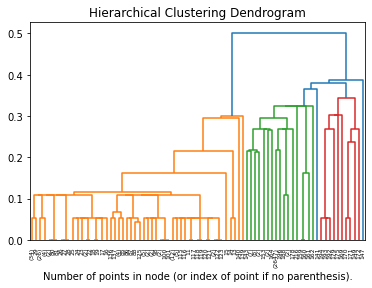

In [7]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()